In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
import torch

# Check if GPU is available≠
if torch.cuda.is_available():
    # Get the number of available GPUs
    num_gpus = torch.cuda.device_count()
    print(f"Number of available GPUs: {num_gpus}")

    # Get the name of each GPU
    for i in range(num_gpus):
        gpu_name = torch.cuda.get_device_name(i)
        print(f"GPU {i}: {gpu_name}")

    # Get the current GPU device
    current_device = torch.cuda.current_device()
    print(f"Current GPU device: {current_device}")

    # Get GPU properties
    gpu_properties = torch.cuda.get_device_properties(current_device)
    print(f"GPU Properties:\n{gpu_properties}")
else:
    print("No GPU available. Switching to CPU.")

Number of available GPUs: 1
GPU 0: Tesla T4
Current GPU device: 0
GPU Properties:
_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)


In [5]:
import torch
import numpy as np

# Initializing a Tensor

## Directly from data

In [6]:
data = [[1,2],[3,4]]

x_data = torch.tensor(data)
print(type(data))
print(type(x_data))
x_data.device

<class 'list'>
<class 'torch.Tensor'>


device(type='cpu')

In [7]:
data = [[1,2],[3,4]]

x_data = torch.tensor(data,device = 'cuda')
print(type(data))
print(type(x_data))
x_data.device

<class 'list'>
<class 'torch.Tensor'>


device(type='cuda', index=0)

In [8]:
torch.rand(3,3)

tensor([[0.6324, 0.6792, 0.3558],
        [0.1605, 0.1724, 0.4498],
        [0.8054, 0.9775, 0.0201]])

# Basic Tensor operation

In [2]:
import torch
import numpy as np

In [3]:
device = 'cpu'

if torch.cuda.is_available():
    device = 'cuda'
device

'cuda'

In [10]:
a = torch.randn(5,7)  # creating in cpu

a = a.to(device) # transfering to gpu
print(a.device)

cuda:0


# Checking How GPU is Faster Then CPU

In [11]:
setup = 'import torch'

gpu_code = '''
a1 = torch.randn(1000,1000,device='cuda')
a2 = torch.randn(1000,1000,device='cuda')
a = a1 @ a2
'''


cpu_code = '''
b1 = torch.randn(1000,1000,device='cpu')
b2 = torch.randn(1000,1000,device='cpu')
b = b1 @ b2
'''

In [20]:
import timeit

t_gpu = timeit.timeit(setup =setup, stmt = gpu_code,number = 1000)

t_cpu = timeit.timeit(setup =setup, stmt = cpu_code,number = 1000)


print(t_gpu)
print(t_cpu)
print("CPU is slower about:",round(((t_cpu-t_gpu)*100)/t_cpu,2),"%")

0.5307453909999822
39.13006384199997
CPU is slower about: 98.64 %


# Neural Network module

In [13]:
from torch import nn
import matplotlib.pyplot as plt

In [14]:
ff = nn.Linear(10,10)
ff.state_dict()

OrderedDict([('weight',
              tensor([[-0.1544,  0.1086, -0.2854,  0.2662, -0.2682, -0.2133, -0.1439, -0.2867,
                        0.0511, -0.2257],
                      [ 0.1331,  0.0077,  0.0038, -0.0634, -0.1746,  0.0361, -0.1099, -0.2278,
                       -0.0291,  0.1093],
                      [-0.0985, -0.0598, -0.1603, -0.2533,  0.1426, -0.1841,  0.0999,  0.2878,
                       -0.0728, -0.1485],
                      [ 0.0350, -0.1133, -0.2442,  0.1255, -0.0417, -0.0108, -0.0892, -0.0974,
                        0.2330,  0.1644],
                      [-0.0525,  0.0528,  0.0156,  0.0215,  0.0003,  0.0735, -0.2245,  0.1789,
                       -0.2731,  0.0475],
                      [ 0.1187, -0.2991, -0.2679,  0.1921, -0.1908,  0.3042,  0.1290,  0.2004,
                        0.1025,  0.2710],
                      [-0.1549,  0.0511,  0.1430, -0.1481,  0.0596, -0.1766, -0.0260,  0.1261,
                       -0.0549, -0.0409],
                 

(array([[3., 2., 2., 0., 0., 1., 1., 0., 0., 1.],
        [0., 1., 1., 2., 1., 3., 1., 1., 0., 0.],
        [1., 1., 2., 3., 0., 0., 1., 1., 0., 1.],
        [0., 1., 0., 3., 2., 1., 1., 1., 1., 0.],
        [1., 1., 0., 0., 2., 4., 1., 1., 0., 0.],
        [2., 1., 0., 0., 0., 0., 2., 1., 2., 2.],
        [0., 0., 3., 0., 3., 2., 1., 1., 0., 0.],
        [4., 0., 0., 1., 0., 1., 2., 0., 0., 2.],
        [0., 2., 0., 1., 3., 1., 1., 0., 0., 2.],
        [0., 0., 0., 1., 3., 2., 0., 2., 1., 1.]]),
 array([-0.30875802, -0.24629658, -0.18383513, -0.1213737 , -0.05891225,
         0.00354919,  0.06601063,  0.12847207,  0.19093351,  0.25339496,
         0.3158564 ]),
 <a list of 10 BarContainer objects>)

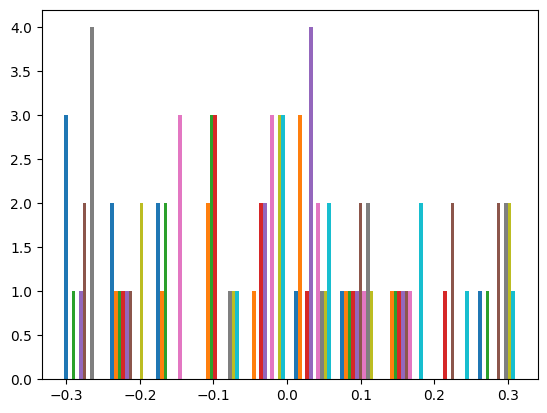

In [15]:
plt.hist(ff.state_dict()["weight"])

(array([11.,  9.,  8., 11., 14., 15., 11.,  8.,  4.,  9.]),
 array([-0.30875802, -0.24629658, -0.18383513, -0.1213737 , -0.05891225,
         0.00354919,  0.06601063,  0.12847207,  0.19093351,  0.25339496,
         0.3158564 ]),
 <BarContainer object of 10 artists>)

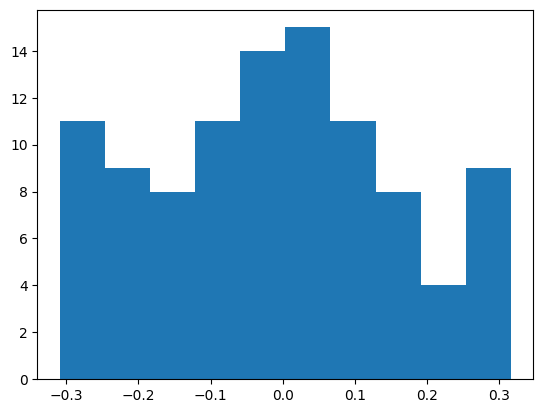

In [16]:
plt.hist(ff.state_dict()["weight"].reshape(-1))

In [17]:
ff.weight.data.normal_(mean=0,std=0.5)  #normalization

tensor([[-0.0160, -0.8576,  0.1354, -0.3999,  0.1871, -0.2274,  0.3788,  0.2959,
         -0.9312,  0.0295],
        [-1.1808, -0.1420,  1.0581, -0.0556, -0.0183,  0.5514, -0.4751, -0.1761,
         -0.8133,  0.5917],
        [-0.3624,  0.3262,  0.1862,  0.2783,  0.3677, -0.6486, -0.1498, -0.5089,
          0.1184,  0.3181],
        [-0.8806, -0.2880, -0.3830, -0.0110, -0.1126,  0.1601,  0.1370,  0.6116,
          0.2295, -0.0380],
        [-0.3379,  0.0991,  0.1764, -0.1956,  0.3379,  0.3732, -0.2100,  0.2297,
          0.7103, -0.6981],
        [ 0.6290,  0.1995,  0.9339,  0.7036,  0.7464,  0.1934, -0.8716, -0.2860,
          0.1280, -0.2357],
        [-0.0133, -0.3214, -0.1115,  0.0349, -0.1405, -0.6433,  0.6538,  0.2872,
          0.6103,  0.4308],
        [ 1.3308, -0.8684, -0.7322,  0.6633, -0.1517, -0.5260, -1.0164, -0.4655,
         -0.1955, -0.1444],
        [-0.2082, -0.2903,  0.6477, -0.2997,  0.4156, -0.3245,  0.5821, -0.4897,
          0.5615,  1.0373],
        [ 0.7592,  

(array([ 3.,  8.,  8., 18., 17., 20., 10., 12.,  3.,  1.]),
 array([-1.18077052, -0.92961323, -0.67845601, -0.42729872, -0.17614147,
         0.07501578,  0.32617304,  0.57733029,  0.82848758,  1.0796448 ,
         1.33080208]),
 <BarContainer object of 10 artists>)

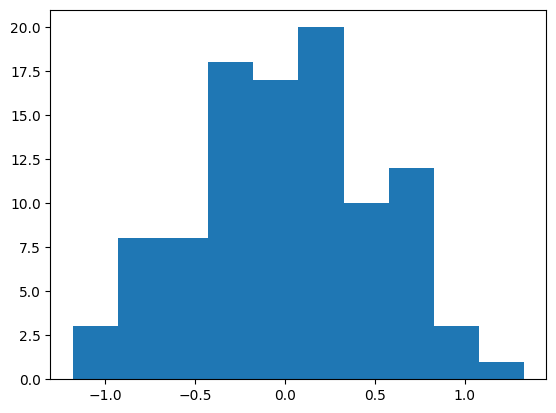

In [18]:
plt.hist(ff.state_dict()["weight"].reshape(-1))

#Working With Data

Dataset - *Sotrage* and internal details <br>
DataLoader *italicised text* - Internal data modiication

In [5]:
#!pip install torchvision --upgrade
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [6]:
training_data = datasets.FashionMNIST(root='fashiondata',train=True,download=True,transform = ToTensor())

100%|██████████| 26421880/26421880 [00:01<00:00, 17544794.62it/s]


Extracting fashiondata/FashionMNIST/raw/train-images-idx3-ubyte.gz to fashiondata/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 302950.30it/s]


Extracting fashiondata/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fashiondata/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5514406.51it/s]


Extracting fashiondata/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fashiondata/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5149601.00it/s]

Extracting fashiondata/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fashiondata/FashionMNIST/raw



In [7]:
testing_data = datasets.FashionMNIST(root='fashiondata',train=False,download=True,transform = ToTensor())

In [8]:
bat_size = 32
train_dataloader = DataLoader(training_data,batch_size=bat_size)
test_dataloader = DataLoader(testing_data, batch_size=bat_size)

In [9]:
for X,y in train_dataloader:
  print(X.shape)
  print(y.shape)
  break

torch.Size([32, 1, 28, 28])
torch.Size([32])


#Creating Model

[Main tutorial](https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/af0caf6d7af0dda755f4c9d7af9ccc2c/quickstart_tutorial.ipynb#scrollTo=jaOMggWcF2CN)

In [55]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


model = NeuralNetwork().to(device)
print(model)
model = model.to(device) # taking model to the gpu
# next code starts from Optiizing the model parameters section. You can skip under the sections

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [46]:
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (lin_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [47]:
for k in model.state_dict():
  print(k)

lin_stack.0.weight
lin_stack.0.bias
lin_stack.2.weight
lin_stack.2.bias
lin_stack.4.weight
lin_stack.4.bias


In [14]:
for k in model.state_dict()['lin_stack.4.bias']:
  print(k)

tensor(0.0168)
tensor(-0.0325)
tensor(-0.0318)
tensor(-0.0375)
tensor(0.0025)
tensor(0.0004)
tensor(0.0121)
tensor(0.0082)
tensor(0.0062)
tensor(0.0398)


In [15]:
wt = model.state_dict()['lin_stack.4.bias']

In [16]:
wt.shape

torch.Size([10])

(array([3., 0., 0., 0., 1., 3., 1., 1., 0., 1.]),
 array([-0.03753745, -0.02980504, -0.02207263, -0.01434022, -0.00660781,
         0.0011246 ,  0.00885701,  0.01658941,  0.02432182,  0.03205423,
         0.03978664]),
 <BarContainer object of 10 artists>)

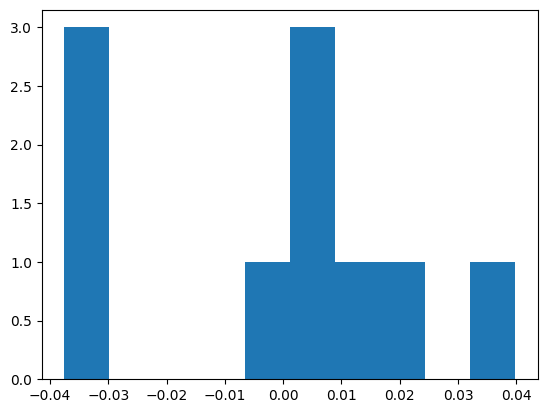

In [17]:
import matplotlib.pyplot as plt
plt.hist(wt)

In [18]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [19]:
device

'cuda'

In [20]:
model = model.to(device)

In [21]:
model.state_dict()['lin_stack.4.bias']

tensor([ 0.0168, -0.0325, -0.0318, -0.0375,  0.0025,  0.0004,  0.0121,  0.0082,
         0.0062,  0.0398], device='cuda:0')

# Optiizing the model parameters

In [22]:
model.parameters()

<generator object Module.parameters at 0x7f2c900cb370>

In [53]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [51]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [50]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [54]:
epochs = 1
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.309472  [   32/60000]
loss: 2.293588  [ 3232/60000]
loss: 2.284685  [ 6432/60000]
loss: 2.252313  [ 9632/60000]
loss: 2.239439  [12832/60000]
loss: 2.242700  [16032/60000]
loss: 2.218139  [19232/60000]
loss: 2.205838  [22432/60000]
loss: 2.200978  [25632/60000]
loss: 2.151222  [28832/60000]
loss: 2.105797  [32032/60000]
loss: 2.060835  [35232/60000]
loss: 2.173076  [38432/60000]
loss: 2.059350  [41632/60000]
loss: 2.029737  [44832/60000]
loss: 2.018790  [48032/60000]
loss: 2.087597  [51232/60000]
loss: 1.982017  [54432/60000]
loss: 1.917442  [57632/60000]
Test Error: 
 Accuracy: 57.8%, Avg loss: 1.904089 

Done!


In [56]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [57]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [59]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = testing_data[0][0], testing_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


#Dataset and Data Loaders

[Main Link](https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/36608d2d57f623ba3a623e0c947a8c3e/data_tutorial.ipynb#scrollTo=_KYc1pEwee8g)

Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code
to be decoupled from our model training code for better readability and modularity.
PyTorch provides two data primitives: ``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``
that allow you to use pre-loaded datasets as well as your own data.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset`` to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that
subclass ``torch.utils.data.Dataset`` and implement functions specific to the particular data.
They can be used to prototype and benchmark your model. You can find them
here: [Image Datasets](https://pytorch.org/vision/stable/datasets.html),
[Text Datasets](https://pytorch.org/text/stable/datasets.html), and
[Audio Datasets](https://pytorch.org/audio/stable/datasets.html)




In [60]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

## Loading a Dataset

Here is an example of how to load the [Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/) dataset from TorchVision.
Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples.
Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

We load the [FashionMNIST Dataset](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) with the following parameters:
 - ``root`` is the path where the train/test data is stored,
 - ``train`` specifies training or test dataset,
 - ``download=True`` downloads the data from the internet if it's not available at ``root``.
 - ``transform`` and ``target_transform`` specify the feature and label transformations



In [61]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 17462489.99it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 305319.59it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5583937.44it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18678440.30it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## Iterating and Visualizing the Dataset

We can index ``Datasets`` manually like a list: ``training_data[index]``.
We use ``matplotlib`` to visualize some samples in our training data.



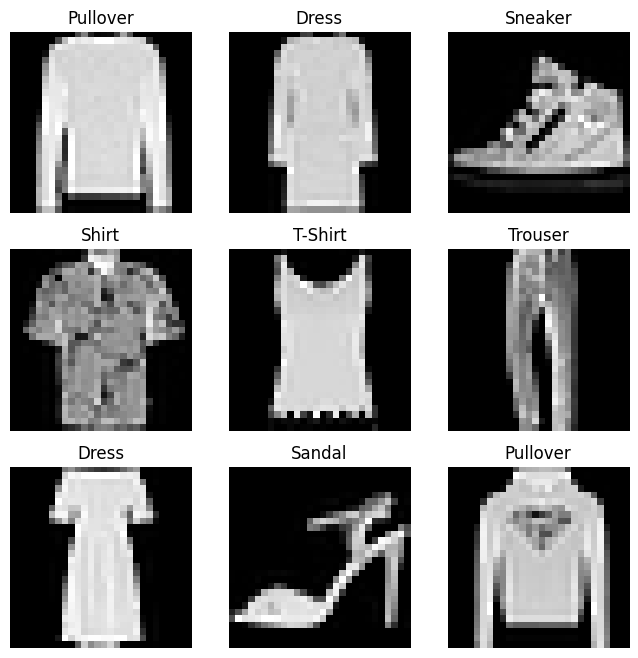

In [62]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Creating a Custom Dataset

A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`.
Take a look at this implementation; the FashionMNIST images are stored
in a directory ``img_dir``, and their labels are stored separately in a CSV file ``annotations_file``.

In the next sections, we'll break down what's happening in each of these functions.

In [63]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### __init__

The __init__ function is run once when instantiating the Dataset object. We initialize
the directory containing the images, the annotations file, and both transforms (covered
in more detail in the next section).

The labels.csv file looks like: ::

    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9



In [66]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

### __len__

The __len__ function returns the number of samples in our dataset.

Example:



In [67]:
def __len__(self):
    return len(self.img_labels)

### __getitem__

The __getitem__ function loads and returns a sample from the dataset at the given index ``idx``.
Based on the index, it identifies the image's location on disk, converts that to a tensor using ``read_image``, retrieves the
corresponding label from the csv data in ``self.img_labels``, calls the transform functions on them (if applicable), and returns the
tensor image and corresponding label in a tuple.



In [68]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

## Preparing data for training with DataLoaders
The ``Dataset`` retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to
pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting, and use Python's ``multiprocessing`` to
speed up data retrieval.

``DataLoader`` is an iterable that abstracts this complexity for us in an easy API.



In [64]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## Iterate through the DataLoader

We have loaded that dataset into the ``DataLoader`` and can iterate through the dataset as needed.
Each iteration below returns a batch of ``train_features`` and ``train_labels`` (containing ``batch_size=64`` features and labels respectively).
Because we specified ``shuffle=True``, after we iterate over all batches the data is shuffled (for finer-grained control over
the data loading order, take a look at [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)).

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


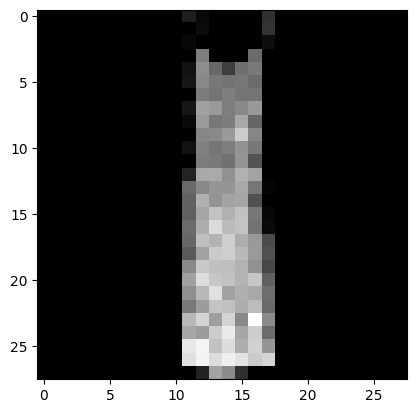

Label: 3


In [65]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

#Transforms


[Learn the Basics](intro.html) ||
[Quickstart](quickstart_tutorial.html) ||
[Tensors](tensorqs_tutorial.html) ||
[Datasets & DataLoaders](data_tutorial.html) ||
**Transforms** ||
[Build Model](buildmodel_tutorial.html) ||
[Autograd](autogradqs_tutorial.html) ||
[Optimization](optimization_tutorial.html) ||
[Save & Load Model](saveloadrun_tutorial.html)

# Transforms

Data does not always come in its final processed form that is required for
training machine learning algorithms. We use **transforms** to perform some
manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters -``transform`` to modify the features and
``target_transform`` to modify the labels - that accept callables containing the transformation logic.
The [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html) module offers
several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are integers.
For training, we need the features as normalized tensors, and the labels as <i>one-hot</i> encoded tensors.
To make these transformations, we use ``ToTensor`` and ``Lambda``.


In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)) #one hot encoding
)



100%|██████████| 26421880/26421880 [00:01<00:00, 19822965.19it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 343870.85it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2701683.01it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17993564.16it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
y = 5
torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

## ToTensor()

[ToTensor](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor)
converts a PIL image or NumPy ``ndarray`` into a ``FloatTensor``. and scales
the image's pixel intensity values in the range [0., 1.]




## Lambda Transforms

Lambda transforms apply any user-defined lambda function. Here, we define a function
to turn the integer into a one-hot encoded tensor.
It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls
[scatter_](https://pytorch.org/docs/stable/generated/torch.Tensor.scatter_.html) which assigns a
``value=1`` on the index as given by the label ``y``.



In [2]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

In [3]:
target_transform

Lambda()